In [166]:
import pandas as np
import yfinance as yf
import numpy as np

In [167]:
tick = yf.Ticker("MSFT")


In [168]:
#tick.info

In [169]:
hist = tick.history("max")

In [170]:
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13,0.055899,0.064119,0.055899,0.061378,1031788800,0.0,0.0
1986-03-14,0.061378,0.064667,0.061378,0.063570,308160000,0.0,0.0
1986-03-17,0.063570,0.065215,0.063570,0.064667,133171200,0.0,0.0
1986-03-18,0.064667,0.065215,0.062474,0.063022,67766400,0.0,0.0
1986-03-19,0.063022,0.063570,0.061378,0.061926,47894400,0.0,0.0
...,...,...,...,...,...,...,...
2022-02-01,310.410004,310.630005,305.130005,308.760010,40950400,0.0,0.0
2022-02-02,309.630005,315.119995,308.880005,313.459991,36636000,0.0,0.0
2022-02-03,309.489990,311.230011,299.959991,301.250000,43730000,0.0,0.0


In [171]:
df = hist.Close


In [172]:
df.head()

Date
1986-03-13    0.061378
1986-03-14    0.063570
1986-03-17    0.064667
1986-03-18    0.063022
1986-03-19    0.061926
Name: Close, dtype: float64

In [173]:
df.tail()

Date
2022-02-01    308.760010
2022-02-02    313.459991
2022-02-03    301.250000
2022-02-04    305.940002
2022-02-07    300.950012
Name: Close, dtype: float64

In [174]:
df.isnull().sum()

0

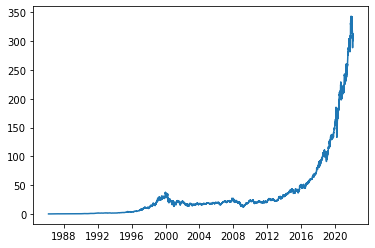

In [175]:
import matplotlib.pyplot as plt
plt.plot(df)

In [176]:
# Data preprocessing
type(df)

pandas.core.series.Series

In [177]:
df = df.to_frame()

In [178]:
type(df)

pandas.core.frame.DataFrame

In [179]:
df.head()

,Close
Date,
1986-03-13,0.061378
1986-03-14,0.063570
1986-03-17,0.064667
1986-03-18,0.063022
1986-03-19,0.061926


In [180]:
df = df.reset_index()

In [181]:
df.columns

Index(['Date', 'Close'], dtype='object')

In [182]:
#type(df)

In [183]:
import datetime as datetime
import pandas as pd
training_dates = pd.to_datetime(df["Date"])

In [184]:
training_dates

0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9046   2022-02-01
9047   2022-02-02
9048   2022-02-03
9049   2022-02-04
9050   2022-02-07
Name: Date, Length: 9051, dtype: datetime64[ns]

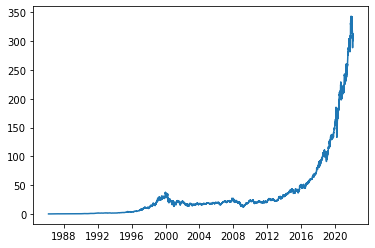

In [185]:
plt.plot(training_dates, df["Close"])

In [186]:
df_for_training = df[["Close"]]

In [187]:
type(df_for_training)

pandas.core.frame.DataFrame

In [188]:
df_for_training.shape

(9051, 1)

In [189]:
#np.reshape(df["Close"], (-1, 1))

In [190]:
#df_for_training = df_for_training.reshape(-1, 1)

In [191]:
# # future scaling
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# sc.fit_transform(df_for_training)

In [192]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(df_for_training)

array([[1.27791492e-05],
       [1.91686423e-05],
       [2.23652295e-05],
       ...,
       [8.77978078e-01],
       [8.91649442e-01],
       [8.77103613e-01]])

In [193]:
# Creating dataset
train_X = []
train_Y = []

n_future = 1
n_past = 14



    

In [194]:
df_test = df_for_training[:100].values
df_test

array([[0.06137838],
       [0.06357031],
       [0.06466691],
       [0.06302229],
       [0.06192635],
       [0.06028238],
       [0.0586384 ],
       [0.05699445],
       [0.05809045],
       [0.05973437],
       [0.06083035],
       [0.06028238],
       [0.05973437],
       [0.06028238],
       [0.06083035],
       [0.06083035],
       [0.05973437],
       [0.06028238],
       [0.06137838],
       [0.06192635],
       [0.06302229],
       [0.06357031],
       [0.06357031],
       [0.0657629 ],
       [0.06631088],
       [0.06411894],
       [0.06411894],
       [0.06302229],
       [0.06329633],
       [0.06959879],
       [0.07398333],
       [0.07453133],
       [0.07233869],
       [0.07069477],
       [0.06959879],
       [0.06959879],
       [0.0690508 ],
       [0.06959879],
       [0.06959879],
       [0.07014679],
       [0.06959879],
       [0.07014679],
       [0.07069477],
       [0.07014679],
       [0.07014679],
       [0.07069477],
       [0.06959879],
       [0.069

In [195]:
df_test.shape

(100, 1)

In [196]:
x_check = []
y_check = []

In [197]:
type(df_test)

numpy.ndarray

In [198]:
for i in range(len(df_test)-n_past-1):
		a = df_test[i:(i+n_past), 0]   ###i=0, 0,1,2,3-----99   100 
		x_check.append(a)
		y_check.append(df_test[i + n_past, 0])
    

In [199]:
len(x_check)

85

In [200]:
x_check

[array([0.06137838, 0.06357031, 0.06466691, 0.06302229, 0.06192635,
        0.06028238, 0.0586384 , 0.05699445, 0.05809045, 0.05973437,
        0.06083035, 0.06028238, 0.05973437, 0.06028238]),
 array([0.06357031, 0.06466691, 0.06302229, 0.06192635, 0.06028238,
        0.0586384 , 0.05699445, 0.05809045, 0.05973437, 0.06083035,
        0.06028238, 0.05973437, 0.06028238, 0.06083035]),
 array([0.06466691, 0.06302229, 0.06192635, 0.06028238, 0.0586384 ,
        0.05699445, 0.05809045, 0.05973437, 0.06083035, 0.06028238,
        0.05973437, 0.06028238, 0.06083035, 0.06083035]),
 array([0.06302229, 0.06192635, 0.06028238, 0.0586384 , 0.05699445,
        0.05809045, 0.05973437, 0.06083035, 0.06028238, 0.05973437,
        0.06028238, 0.06083035, 0.06083035, 0.05973437]),
 array([0.06192635, 0.06028238, 0.0586384 , 0.05699445, 0.05809045,
        0.05973437, 0.06083035, 0.06028238, 0.05973437, 0.06028238,
        0.06083035, 0.06083035, 0.05973437, 0.06028238]),
 array([0.06028238, 0.0586384 

In [201]:
len(y_check)

85

In [202]:
df_for_training.shape

(9051, 1)

In [203]:
df_for_training = df_for_training.values

In [204]:
df_for_training

array([[6.13783784e-02],
       [6.35703132e-02],
       [6.46669120e-02],
       ...,
       [3.01250000e+02],
       [3.05940002e+02],
       [3.00950012e+02]])

In [205]:
for i in range(len(df_for_training)-n_past-1):
		a = df_for_training[i:(i+n_past), 0]   ###i=0, 0,1,2,3-----99   100 
		train_X.append(a)
		train_Y.append(df_for_training[i + n_past, 0])

In [206]:
# for i in range(len(df_for_training) - n_future - 1):
#     a = df_test.iloc[i:(i+n_past), 0]
#     train_X.append(a)
#     train.append(df.loc[n_past+i][1])

In [207]:
# converting to array
train_X = np.array(train_X)
train_Y = np.array(train_Y)

In [208]:
train_Y

array([6.08303510e-02, 6.08303510e-02, 5.97343706e-02, ...,
       3.13459991e+02, 3.01250000e+02, 3.05940002e+02])

In [209]:
print(train_X.shape)
print(train_Y.shape)

(9036, 14)
(9036,)


In [210]:
train_X = train_X.reshape(train_X.shape[0], train_X.shape[1], n_future)
train_X.shape

(9036, 14, 1)

In [211]:
#bug
#train_X[-90:]

In [212]:
train_X.shape

(9036, 14, 1)

In [213]:
train_Y = train_Y.reshape(train_Y.shape[0], n_future)
train_Y.shape

(9036, 1)

### Building Model

In [214]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [215]:
model=Sequential()
model.add(LSTM(50,activation = "relu", return_sequences=True,input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(LSTM(50,activation = "relu", return_sequences=True))
model.add(LSTM(50, activation = "relu"))
model.add(Dense(train_Y.shape[1]))
model.compile(loss='mean_squared_error',optimizer='adam')


In [216]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 14, 50)            10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 14, 50)            20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [217]:
# fiting model
#hist = model.fit(train_X, train_Y, epochs=100, batch_size=10, validation_split=0.1, verbose=1)

In [218]:
#model.save("stock_prediction_lstm.h5")

In [219]:
from tensorflow import keras
model1 = keras.models.load_model("stock_prediction_lstm.h5")

In [220]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 14, 50)            10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 14, 50)            20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [221]:
n_future = 90
forecast_period_date = pd.date_range(list(training_dates)[-1], periods=n_future, freq="1d").tolist()


In [266]:
forecast_period_date

[Timestamp('2022-02-07 00:00:00', freq='D'),
 Timestamp('2022-02-08 00:00:00', freq='D'),
 Timestamp('2022-02-09 00:00:00', freq='D'),
 Timestamp('2022-02-10 00:00:00', freq='D'),
 Timestamp('2022-02-11 00:00:00', freq='D'),
 Timestamp('2022-02-12 00:00:00', freq='D'),
 Timestamp('2022-02-13 00:00:00', freq='D'),
 Timestamp('2022-02-14 00:00:00', freq='D'),
 Timestamp('2022-02-15 00:00:00', freq='D'),
 Timestamp('2022-02-16 00:00:00', freq='D'),
 Timestamp('2022-02-17 00:00:00', freq='D'),
 Timestamp('2022-02-18 00:00:00', freq='D'),
 Timestamp('2022-02-19 00:00:00', freq='D'),
 Timestamp('2022-02-20 00:00:00', freq='D'),
 Timestamp('2022-02-21 00:00:00', freq='D'),
 Timestamp('2022-02-22 00:00:00', freq='D'),
 Timestamp('2022-02-23 00:00:00', freq='D'),
 Timestamp('2022-02-24 00:00:00', freq='D'),
 Timestamp('2022-02-25 00:00:00', freq='D'),
 Timestamp('2022-02-26 00:00:00', freq='D'),
 Timestamp('2022-02-27 00:00:00', freq='D'),
 Timestamp('2022-02-28 00:00:00', freq='D'),
 Timestamp

In [223]:
train_X[- n_future:]

array([[[296.70718384],
        [295.16998291],
        [296.44763184],
        ...,
        [298.80334473],
        [293.6328125 ],
        [283.00222778]],

       [[295.16998291],
        [296.44763184],
        [299.24255371],
        ...,
        [293.6328125 ],
        [283.00222778],
        [283.48135376]],

       [[296.44763184],
        [299.24255371],
        [304.2633667 ],
        ...,
        [283.00222778],
        [283.48135376],
        [281.40518188]],

       ...,

       [[318.26998901],
        [304.79998779],
        [310.20001221],
        ...,
        [308.26000977],
        [310.98001099],
        [308.76000977]],

       [[304.79998779],
        [310.20001221],
        [302.6499939 ],
        ...,
        [310.98001099],
        [308.76000977],
        [313.45999146]],

       [[310.20001221],
        [302.6499939 ],
        [303.32998657],
        ...,
        [308.76000977],
        [313.45999146],
        [301.25      ]]])

In [224]:
#a = [ i for i in range(100)]

In [225]:
#a = np.reshape(a, (-1, 1))

In [226]:
#a = sc.transform(a)

In [227]:
#a[90:]

In [228]:
#-n_future
train_X

array([[[6.13783784e-02],
        [6.35703132e-02],
        [6.46669120e-02],
        ...,
        [6.02823831e-02],
        [5.97343706e-02],
        [6.02823831e-02]],

       [[6.35703132e-02],
        [6.46669120e-02],
        [6.30222857e-02],
        ...,
        [5.97343706e-02],
        [6.02823831e-02],
        [6.08303510e-02]],

       [[6.46669120e-02],
        [6.30222857e-02],
        [6.19263500e-02],
        ...,
        [6.02823831e-02],
        [6.08303510e-02],
        [6.08303510e-02]],

       ...,

       [[3.18269989e+02],
        [3.04799988e+02],
        [3.10200012e+02],
        ...,
        [3.08260010e+02],
        [3.10980011e+02],
        [3.08760010e+02]],

       [[3.04799988e+02],
        [3.10200012e+02],
        [3.02649994e+02],
        ...,
        [3.10980011e+02],
        [3.08760010e+02],
        [3.13459991e+02]],

       [[3.10200012e+02],
        [3.02649994e+02],
        [3.03329987e+02],
        ...,
        [3.08760010e+02],
        [3.1345

In [229]:
len(train_X)-90

8946

In [230]:
df_forcast = train_X[8946:]

In [231]:
df_forcast

array([[[296.70718384],
        [295.16998291],
        [296.44763184],
        ...,
        [298.80334473],
        [293.6328125 ],
        [283.00222778]],

       [[295.16998291],
        [296.44763184],
        [299.24255371],
        ...,
        [293.6328125 ],
        [283.00222778],
        [283.48135376]],

       [[296.44763184],
        [299.24255371],
        [304.2633667 ],
        ...,
        [283.00222778],
        [283.48135376],
        [281.40518188]],

       ...,

       [[318.26998901],
        [304.79998779],
        [310.20001221],
        ...,
        [308.26000977],
        [310.98001099],
        [308.76000977]],

       [[304.79998779],
        [310.20001221],
        [302.6499939 ],
        ...,
        [310.98001099],
        [308.76000977],
        [313.45999146]],

       [[310.20001221],
        [302.6499939 ],
        [303.32998657],
        ...,
        [308.76000977],
        [313.45999146],
        [301.25      ]]])

In [232]:
df_forcast.shape


(90, 14, 1)

In [233]:
df = df_forcast.reshape(df_forcast.shape[0], df_forcast.shape[1] *  df_forcast.shape[2])
df

array([[296.70718384, 295.16998291, 296.44763184, ..., 298.80334473,
        293.6328125 , 283.00222778],
       [295.16998291, 296.44763184, 299.24255371, ..., 293.6328125 ,
        283.00222778, 283.48135376],
       [296.44763184, 299.24255371, 304.2633667 , ..., 283.00222778,
        283.48135376, 281.40518188],
       ...,
       [318.26998901, 304.79998779, 310.20001221, ..., 308.26000977,
        310.98001099, 308.76000977],
       [304.79998779, 310.20001221, 302.6499939 , ..., 310.98001099,
        308.76000977, 313.45999146],
       [310.20001221, 302.6499939 , 303.32998657, ..., 308.76000977,
        313.45999146, 301.25      ]])

In [234]:
df.shape

(90, 14)

In [235]:
df = pd.DataFrame(df)

In [236]:
type(df)

pandas.core.frame.DataFrame

In [237]:
df.columns

RangeIndex(start=0, stop=14, step=1)

In [238]:
# df_forcast = df_forcast.reshape(df_forcast.shape[0], df_forcast.shape[1] *  df_forcast.shape[2])
# df_forcast

In [239]:
df_forcast.shape

(90, 14, 1)

In [240]:
#df_forcast = sc.transform(df_forcast)

In [241]:
# test = train_X[-n_future:]

In [242]:
# type(test)

In [256]:
forecast = model1.predict(train_X[-n_future:])
forecast

array([[285.34784],
       [282.7851 ],
       [279.0868 ],
       [274.8396 ],
       [272.928  ],
       [276.407  ],
       [278.69943],
       [280.9437 ],
       [287.90414],
       [284.9684 ],
       [285.5265 ],
       [287.50696],
       [290.87692],
       [294.13113],
       [296.32837],
       [300.28366],
       [302.66205],
       [303.90976],
       [305.5488 ],
       [304.64175],
       [303.08112],
       [303.74548],
       [312.1557 ],
       [315.09503],
       [319.17035],
       [321.5318 ],
       [324.883  ],
       [325.8398 ],
       [327.22443],
       [329.76486],
       [331.97604],
       [331.5924 ],
       [328.67413],
       [323.2504 ],
       [322.77026],
       [323.59308],
       [324.55215],
       [326.83536],
       [333.64325],
       [333.25244],
       [331.26257],
       [328.13763],
       [325.5848 ],
       [323.88013],
       [322.81314],
       [322.54678],
       [321.8525 ],
       [319.30447],
       [318.85355],
       [315.52344],


In [257]:
forecast.shape

(90, 1)

In [274]:
forecast_copies = np.repeat(forecast, df_for_training.shape[1], axis = 1)
y_pred_future = forecast_copies

In [263]:
forecast_copies[:,0]

array([285.34784, 282.7851 , 279.0868 , 274.8396 , 272.928  , 276.407  ,
       278.69943, 280.9437 , 287.90414, 284.9684 , 285.5265 , 287.50696,
       290.87692, 294.13113, 296.32837, 300.28366, 302.66205, 303.90976,
       305.5488 , 304.64175, 303.08112, 303.74548, 312.1557 , 315.09503,
       319.17035, 321.5318 , 324.883  , 325.8398 , 327.22443, 329.76486,
       331.97604, 331.5924 , 328.67413, 323.2504 , 322.77026, 323.59308,
       324.55215, 326.83536, 333.64325, 333.25244, 331.26257, 328.13763,
       325.5848 , 323.88013, 322.81314, 322.54678, 321.8525 , 319.30447,
       318.85355, 315.52344, 320.4202 , 320.0818 , 323.2272 , 328.94513,
       334.5971 , 325.97293, 320.87476, 318.28357, 317.3368 , 314.99774,
       315.98297, 318.2879 , 322.2496 , 328.75998, 332.7489 , 339.3682 ,
       336.1438 , 332.07306, 323.85345, 319.3985 , 315.66586, 311.7134 ,
       305.45526, 303.6557 , 302.7677 , 301.57437, 302.6665 , 297.80914,
       295.15237, 291.52014, 288.89847, 290.76727, 

In [252]:
#y_pred_future = sc.inverse_transform(forecast_copies)[:,0]

In [253]:
#y_pred_future

In [271]:
forecast_period_date[0].date()

datetime.date(2022, 2, 7)

In [272]:
forecast_dates = []
for time_i in forecast_period_date:
   forecast_dates.append(time_i.date())


In [273]:
forecast_dates

[datetime.date(2022, 2, 7),
 datetime.date(2022, 2, 8),
 datetime.date(2022, 2, 9),
 datetime.date(2022, 2, 10),
 datetime.date(2022, 2, 11),
 datetime.date(2022, 2, 12),
 datetime.date(2022, 2, 13),
 datetime.date(2022, 2, 14),
 datetime.date(2022, 2, 15),
 datetime.date(2022, 2, 16),
 datetime.date(2022, 2, 17),
 datetime.date(2022, 2, 18),
 datetime.date(2022, 2, 19),
 datetime.date(2022, 2, 20),
 datetime.date(2022, 2, 21),
 datetime.date(2022, 2, 22),
 datetime.date(2022, 2, 23),
 datetime.date(2022, 2, 24),
 datetime.date(2022, 2, 25),
 datetime.date(2022, 2, 26),
 datetime.date(2022, 2, 27),
 datetime.date(2022, 2, 28),
 datetime.date(2022, 3, 1),
 datetime.date(2022, 3, 2),
 datetime.date(2022, 3, 3),
 datetime.date(2022, 3, 4),
 datetime.date(2022, 3, 5),
 datetime.date(2022, 3, 6),
 datetime.date(2022, 3, 7),
 datetime.date(2022, 3, 8),
 datetime.date(2022, 3, 9),
 datetime.date(2022, 3, 10),
 datetime.date(2022, 3, 11),
 datetime.date(2022, 3, 12),
 datetime.date(2022, 3, 13

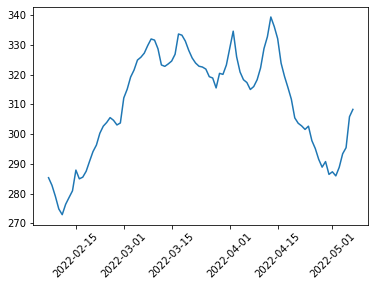

In [278]:
plt.plot(forecast_dates,  y_pred_future)
plt.xticks(rotation=45)
plt.show()

In [285]:
y_pred_future = y_pred_future.flatten()

In [286]:
df_future = pd.DataFrame({"Date":np.array(forecast_dates), "Close":y_pred_future})

In [291]:
df_future["Date"] = pd.to_datetime(df_future["Date"])

In [292]:
df_future

,Date,Close
0,2022-02-07,285.347839
1,2022-02-08,282.785095
2,2022-02-09,279.086792
3,2022-02-10,274.839600
4,2022-02-11,272.928009
...,...,...
85,2022-05-03,288.843445
86,2022-05-04,293.382935
87,2022-05-05,295.437256
88,2022-05-06,305.841248


In [293]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,296.707184,295.169983,296.447632,299.242554,304.263367,304.662628,299.322388,293.762543,294.261627,298.034729,299.012939,298.803345,293.632812,283.002228
1,295.169983,296.447632,299.242554,304.263367,304.662628,299.322388,293.762543,294.261627,298.034729,299.012939,298.803345,293.632812,283.002228,283.481354
2,296.447632,299.242554,304.263367,304.662628,299.322388,293.762543,294.261627,298.034729,299.012939,298.803345,293.632812,283.002228,283.481354,281.405182
3,299.242554,304.263367,304.662628,299.322388,293.762543,294.261627,298.034729,299.012939,298.803345,293.632812,283.002228,283.481354,281.405182,288.572052
4,304.263367,304.662628,299.322388,293.762543,294.261627,298.034729,299.012939,298.803345,293.632812,283.002228,283.481354,281.405182,288.572052,282.592987


In [297]:
original = hist["Close"]
original = original.to_frame().reset_index()

In [299]:
original.head()

,Date,Close
0,1986-03-13,0.061378
1,1986-03-14,0.063570
2,1986-03-17,0.064667
3,1986-03-18,0.063022
4,1986-03-19,0.061926


In [300]:
original.tail()

,Date,Close
9046,2022-02-01,308.760010
9047,2022-02-02,313.459991
9048,2022-02-03,301.250000
9049,2022-02-04,305.940002
9050,2022-02-07,300.950012


In [302]:
original["Date"].dtype

dtype('<M8[ns]')

In [304]:
#test["dates"] = df_future["Date"] + original["Date"]

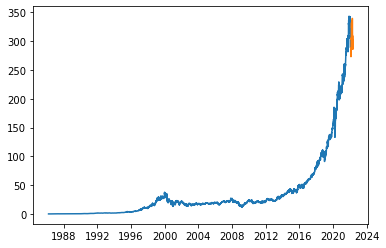

In [305]:
plt.plot(original["Date"], original["Close"])
plt.plot(df_future["Date"], df_future["Close"])
